In [1]:
# Random Forest - Probelm No.o2- Fraud Data
#Use decision trees to prepare a model on fraud data 
#treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
!pip install catergorical_encoders
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

ERROR: Could not find a version that satisfies the requirement catergorical_encoders (from versions: none)
ERROR: No matching distribution found for catergorical_encoders


In [3]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [7]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
fraud1=encoder.fit_transform(fraud)

In [8]:
tax_val = []
for value in fraud["Taxable.Income"]:
    if value<=30000:
        tax_val.append("Risky")
    else:
        tax_val.append("Good")
        
fraud1["tax_val"]= tax_val

In [9]:
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_val
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


In [10]:
x = fraud1.drop(['tax_val','Taxable.Income'], axis =1)
y = fraud1['tax_val']

In [11]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [12]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_val, Length: 600, dtype: object

In [13]:
# Random Forest Classification

num_trees = 500
max_features = 3
kfold = KFold(n_splits=10, random_state=None,shuffle=True)
model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model1, x, y, cv=kfold)
print(results.mean())

0.7416666666666667


In [14]:
model1.fit(x,y)

RandomForestClassifier(max_features=3, n_estimators=500)

In [15]:
model1.predict(x)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [16]:
#Decision Tree

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [18]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
3,2,1,193264,15,1
149,1,1,49505,25,2
212,2,2,112659,14,2
585,1,1,137622,2,1
524,2,3,164391,27,2
...,...,...,...,...,...
440,1,1,170407,13,1
165,2,3,38463,23,1
7,2,1,131253,3,1
219,2,2,26814,9,2


In [19]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,2,1,28504,1,2
307,1,2,31819,25,2
253,2,1,77256,29,2
528,1,3,172612,10,2
137,2,1,115884,6,2
...,...,...,...,...,...
221,2,1,134135,14,2
390,2,1,57324,17,2
530,2,2,194421,17,1
232,2,3,150349,2,2


In [20]:
y_train

3       Good
149     Good
212     Good
585     Good
524    Risky
       ...  
440     Good
165     Good
7       Good
219    Risky
326    Risky
Name: tax_val, Length: 420, dtype: object

In [21]:
y_test

159     Good
307     Good
253     Good
528     Good
137    Risky
       ...  
221     Good
390     Good
530     Good
232    Risky
139     Good
Name: tax_val, Length: 180, dtype: object

In [22]:
#Building Decision Tree Classifier using Entropy Criteria

In [23]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

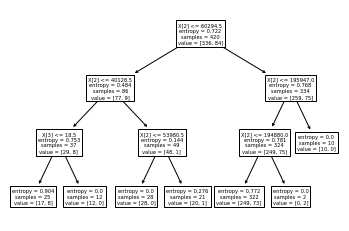

In [24]:
#PLot the decision tree
tree.plot_tree(model);

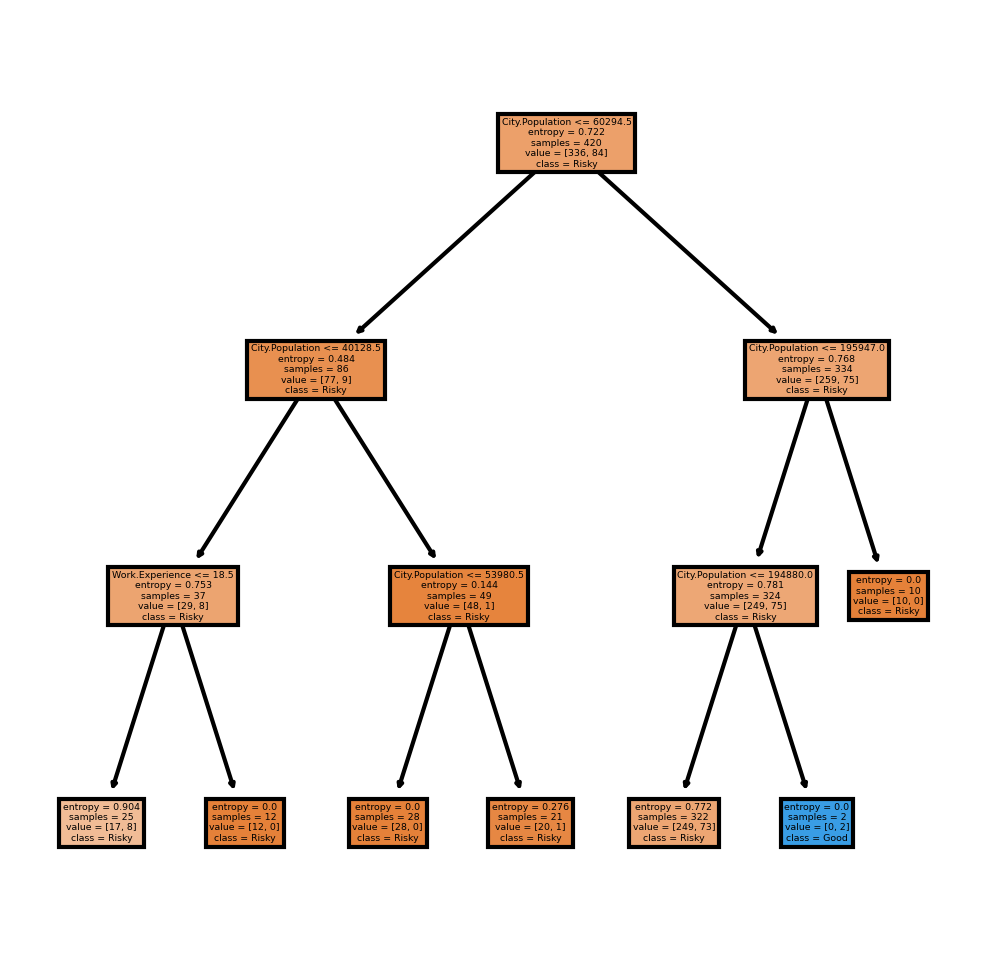

In [25]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [26]:
# Predicting Data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Good     179
Risky      1
dtype: int64

In [27]:
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [28]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,Good,Risky
tax_val,,
Good,139,1
Risky,40,0


In [29]:
# Checking accuracy of model
model.score(x_test, y_test)

0.7722222222222223

In [30]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [31]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

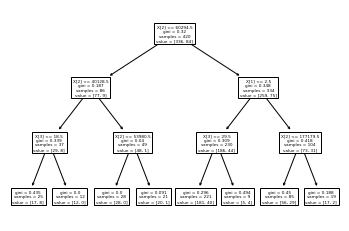

In [32]:
# Plotting Decision tree
tree.plot_tree(model_CART);

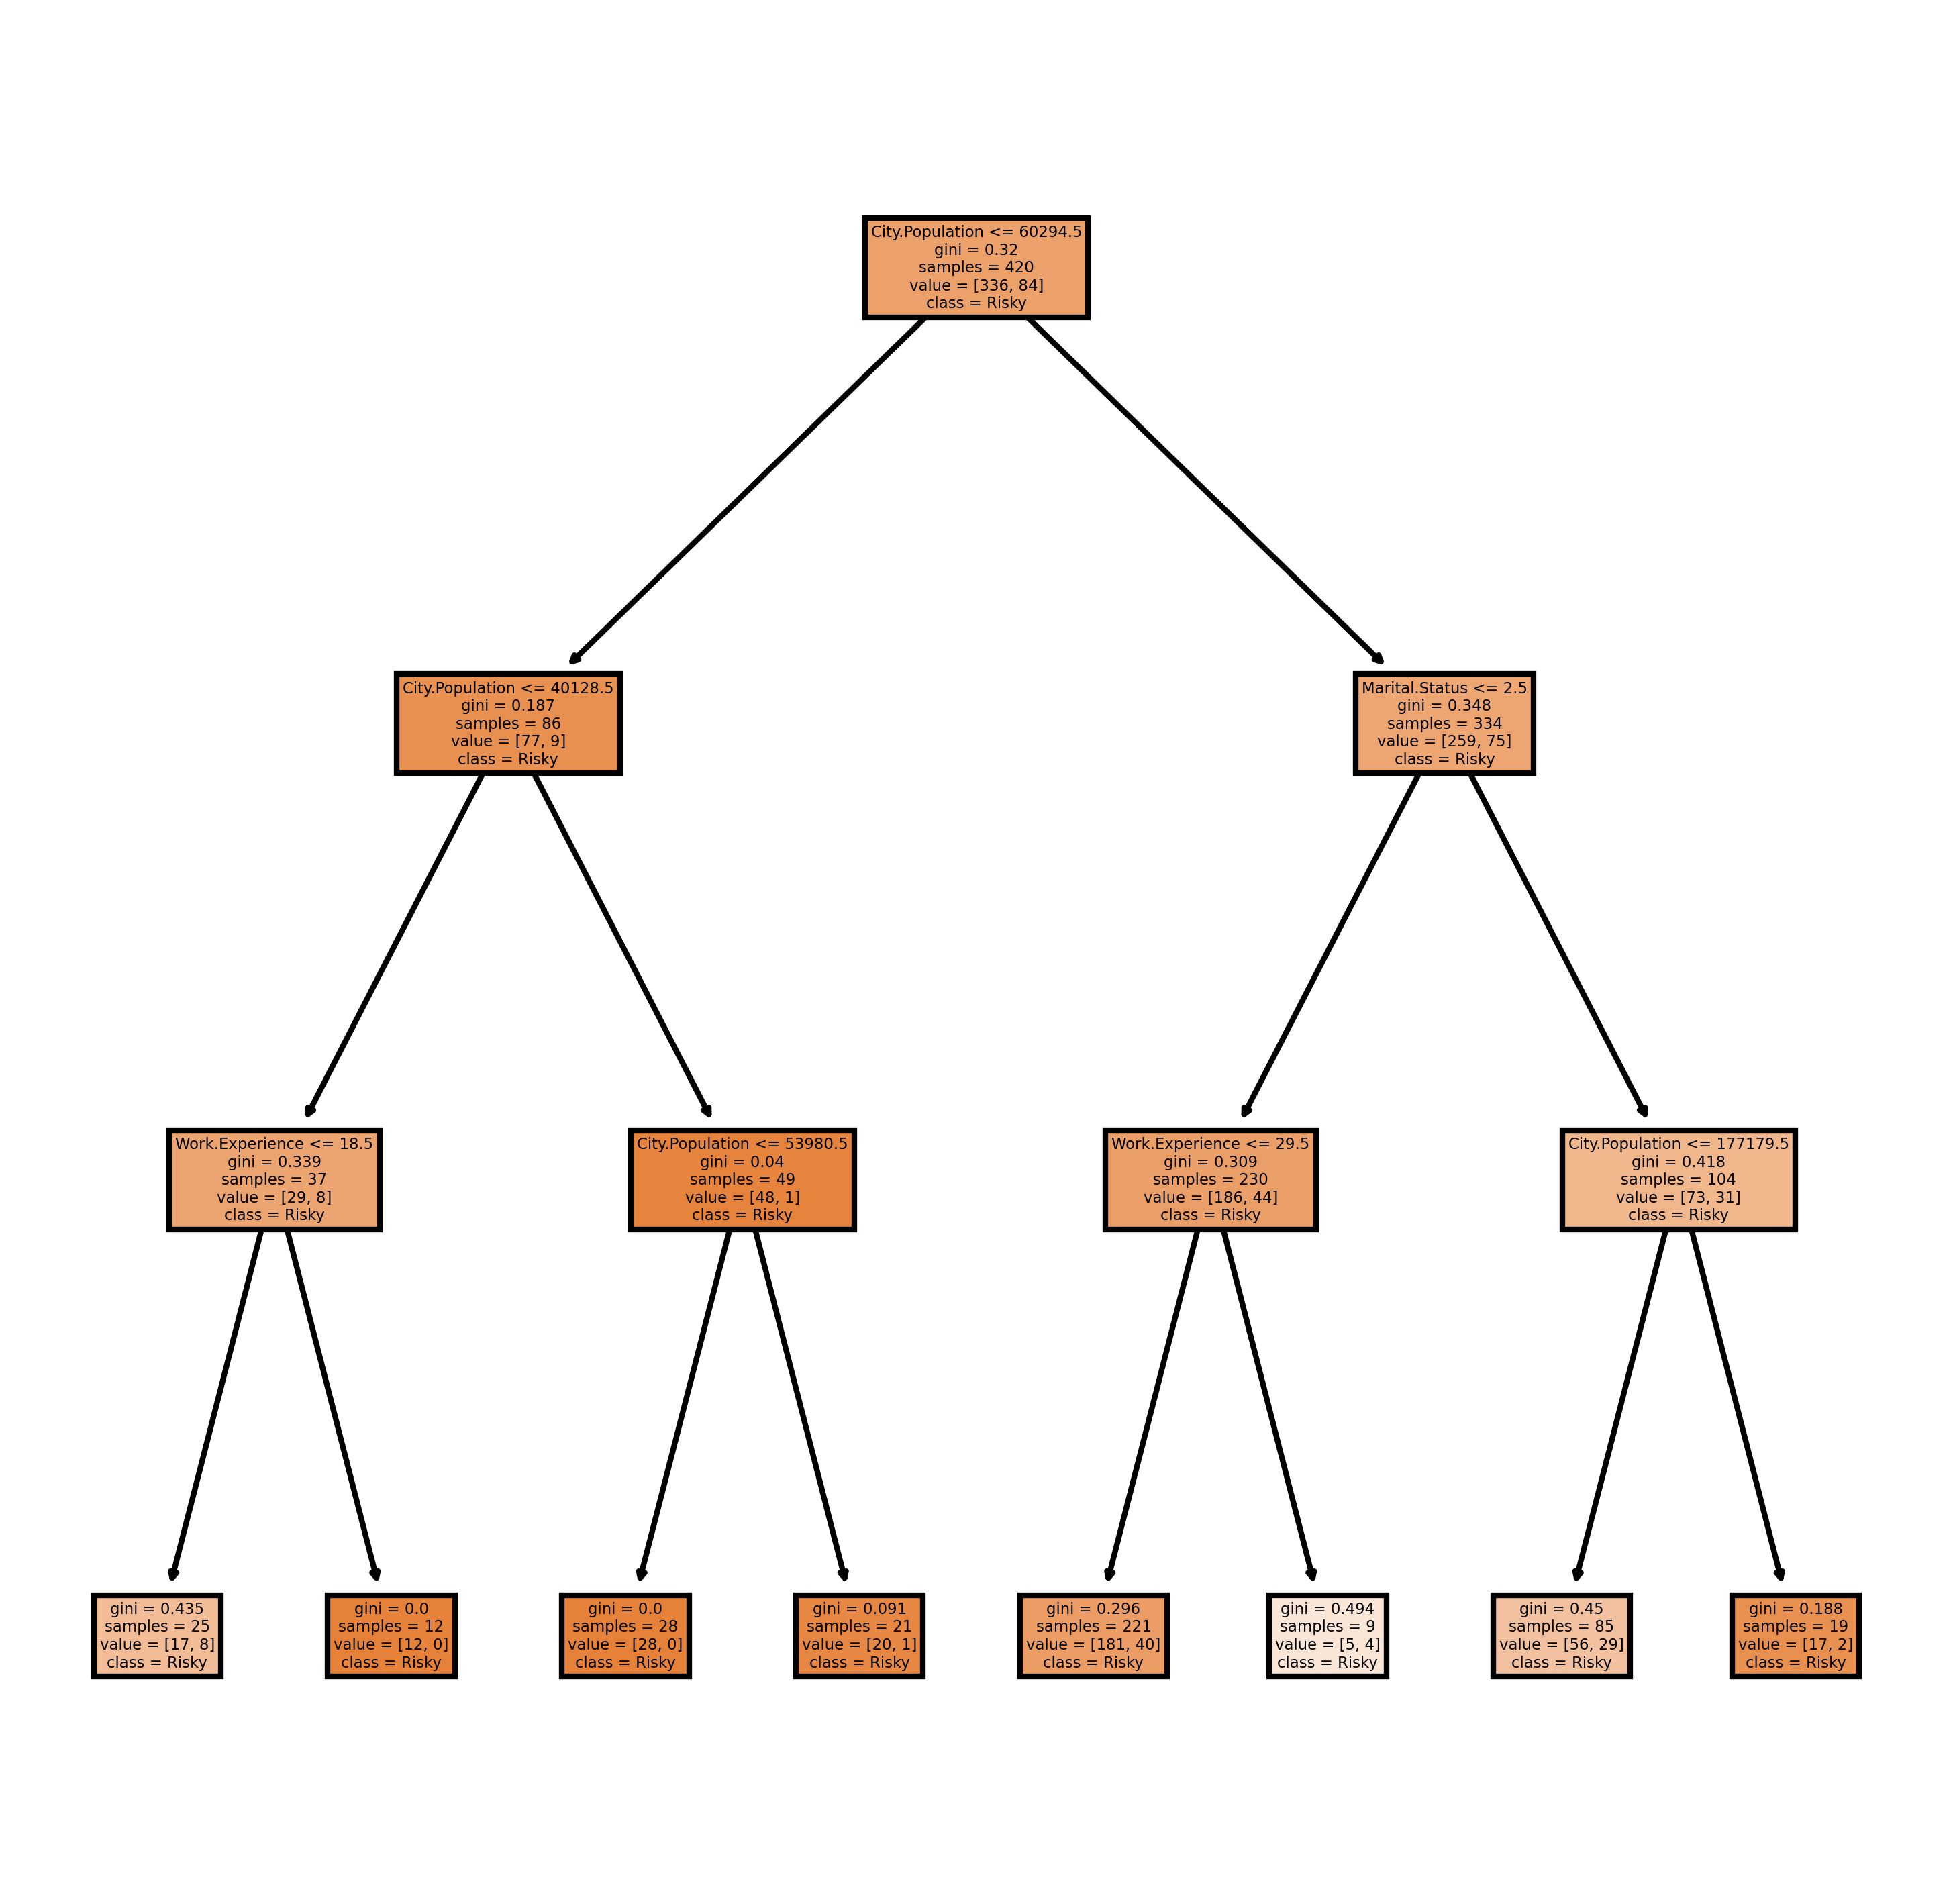

In [33]:
ffn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:
# Predicting Data
preds1 = model_CART.predict(x_test)
pd.Series(preds).value_counts()

Good     179
Risky      1
dtype: int64

In [35]:
preds1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [36]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds1)

col_0,Good
tax_val,
Good,140
Risky,40


In [37]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.7777777777777778

In [38]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

x = fraud1.drop(['tax_val','Taxable.Income'], axis =1)
y = fraud1['tax_val']

kfold1 = KFold(n_splits=7, random_state=None,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model2 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=None)
results2 = cross_val_score(model2, x, y, cv=kfold1)
print(results2.mean())



0.7348446355286301


In [39]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

x = fraud1.drop(['tax_val','Taxable.Income'], axis =1)
y = fraud1['tax_val']

num_trees = 8
seed=7
kfold2= KFold(n_splits=8,random_state=None,shuffle=True)
model3= AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results3 = cross_val_score(model3, x, y, cv=kfold2)
print(results3.mean())

0.7916666666666667


In [40]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


x = fraud1.drop(['tax_val','Taxable.Income'], axis =1)
y = fraud1['tax_val']

kfold3= KFold(n_splits=10, random_state=None,shuffle=True)

# create the sub models
estimators = []
model4 = LogisticRegression(max_iter=400)
estimators.append(('logistic', model4))
model5 = DecisionTreeClassifier()
estimators.append(('cart', model5))
model6 = SVC()
estimators.append(('svm', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x,y, cv=kfold3)
print(results.mean())

0.7933333333333333
